# Reviewer Insights and Participation Trends in the Aave Grants DAO

### Omniacs.DAO

### 2025-06-08


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# Set up the visual style for plots
sns.set_theme(style="whitegrid")

# Define color palette and specific colors used in the original R code
# These colors correspond to #C0E2E7 (fill) and #3FB5C3 (edge/line)
fill_color = "#C0E2E7"
line_color = "#3FB5C3"

# Load the dataset
try:
    grants = pd.read_csv("data/ApplicationsAnonymized.csv")
except FileNotFoundError:
    print("Error: 'data/ApplicationsAnonymized.csv' not found.")
    print("Please ensure the CSV file is in a 'data' subfolder.")
    # Create a dummy dataframe to prevent further errors if file is not found
    grants = pd.DataFrame()

# Rename column to match the R script's correction
if 'Interview Rational' in grants.columns:
    grants.rename(columns={'Interview Rational': 'Interview Rationale'}, inplace=True)

print("Setup complete and data loaded.")
grants.head()

Setup complete and data loaded.


,Project Name,Record ID,Review,Applicant Name,Status,Recipients,Grant Category,Reviewer,Reviewer ID,Project Description,...,Amount Paid,Days since pending,Today's Date,Approval Email,Feedback,Grant (from Recipients),Status (from Recipients),Reviewer (from Review Feedback),Previous Grants,Source
0,Aave-Pricing,rec1zAXuVn0fA6zv1,"""No, shouldn't fund.""",Applicant1,Review failed,NaN,Developer tooling,Reviewer1,ReviewerID1,Summary: \nAave-Pricing is an innovative proje...,...,NaN,51,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback1,No,Twitter
1,deuces9ers/deucespicknpin,recuXILXMjBhd7Ee5,"""No, shouldn't fund.""",Applicant2,Review failed,NaN,Developer tooling,Reviewer1,ReviewerID1,described above,...,NaN,50,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback1,No,Website
2,ForeignAssistance,recnsFU8JUlLvcxMK,"""No, shouldn't fund.""",Applicant3,Review failed,NaN,Applications and integrations,Reviewer1,ReviewerID1,ForeignAssistance is a dApp for helping studen...,...,NaN,43,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback1,No,Website
3,Nodefy,reczWBbAvY7NN4alT,NaN,Applicant4,In progress,NaN,Applications and integrations,Reviewer2,ReviewerID2,Nodefy is a notifications-as-a-service solutio...,...,NaN,40,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback2,No,Research
4,GameGPT,reco2P5P0vd8RNcKX,NaN,Applicant5,In progress,NaN,Community (marketing and educational),Reviewer3,ReviewerID3,"GameGPT, developed by Prism, is designed to of...",...,NaN,40,"July 23, 2024",NaN,NaN,NaN,NaN,ReviewerFromReviewFeedback2,No,Research


<img src="Shot_Poses_IACS/OmniacPoses_01.png" width="120" style="float:right; margin: 8px 0 8px 20px;">



## Introduction

The Aave Grants DAO exists to provide grants to innovative ideas and projects which have a direct benefit to the broader Aave community. The DAO funds grants from a broad array of categories including developer tooling, events, and applications.

In this analysis, we've collected data on the historical grants that have been submitted to the DAO. The information includes data on the grant proposal itself, as well as information on the reviews of that proposal. This analysis is produced in an effort to provide the utmost transparency about the Aave Grants DAO, and to derive insights into what types of projects have consistently done the best in terms of acceptance, and ultimate outcomes.

This document focuses on a reviewer-based analysis, where we analyze metrics of the reviews and interviews conducted.

<img src="Shot_Poses_IACS/OmniacPoses_11.png" width="120" style="left; margin: 8px 0 8px 20px;">

## Reviewer-based Analysis

Here, we are going to look at the reviewers of the grants themselves, their characteristics in terms of the number of reviews they've done, their acceptance rates, and the typical length of their reviews. Let's get started!

First, a simple plot of the number of reviewers by quarter shows that for about the last year, the number of unique reviewers has been around a dozen.

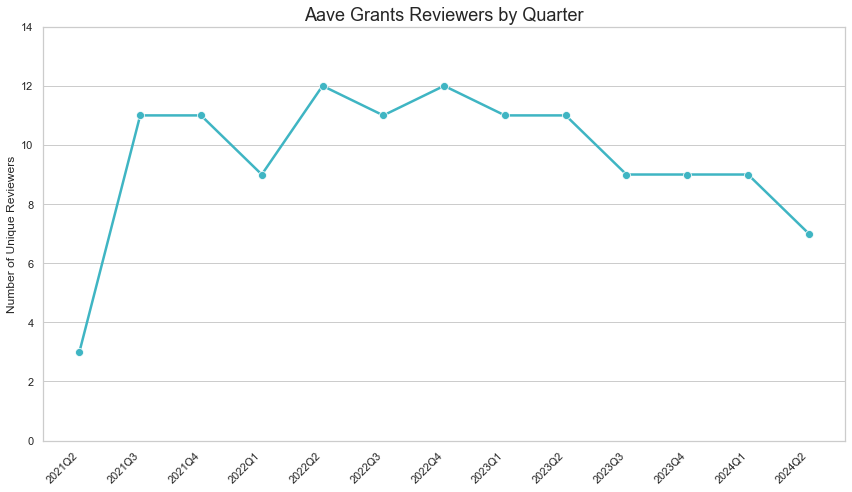

In [3]:
# Prepare the data
grants['Date'] = pd.to_datetime(grants['Month'])
grants['Quarter'] = grants['Date'].dt.to_period('Q').astype(str)

# Explode reviewer IDs from comma-separated string to separate rows
reviewers_by_quarter = grants[['Quarter', 'Reviewer ID']].copy()
reviewers_by_quarter.dropna(subset=['Reviewer ID'], inplace=True)
reviewers_by_quarter['Reviewer ID'] = reviewers_by_quarter['Reviewer ID'].str.split(',')
reviewers_by_quarter = reviewers_by_quarter.explode('Reviewer ID')
reviewers_by_quarter['Reviewer ID'] = reviewers_by_quarter['Reviewer ID'].str.strip()


# Group by quarter and count unique reviewers
quarterly_summary = reviewers_by_quarter.groupby('Quarter')['Reviewer ID'].nunique().reset_index()
quarterly_summary.rename(columns={'Reviewer ID': 'Reviewers'}, inplace=True)

# Define the line color used in the plot
line_color = "#3FB5C3"

# Create the plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=quarterly_summary, x='Quarter', y='Reviewers', sort=True, color=line_color, lw=2.5, marker='o', markersize=8)

plt.title('Aave Grants Reviewers by Quarter', fontsize=18)
plt.xlabel('')
plt.ylabel('Number of Unique Reviewers')
plt.yticks(range(0, 16, 2))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

We can plot this and display the name of the reviewers inside the bar. We clearly see certain reviewers have been around since quite early on in the Grants DAO!

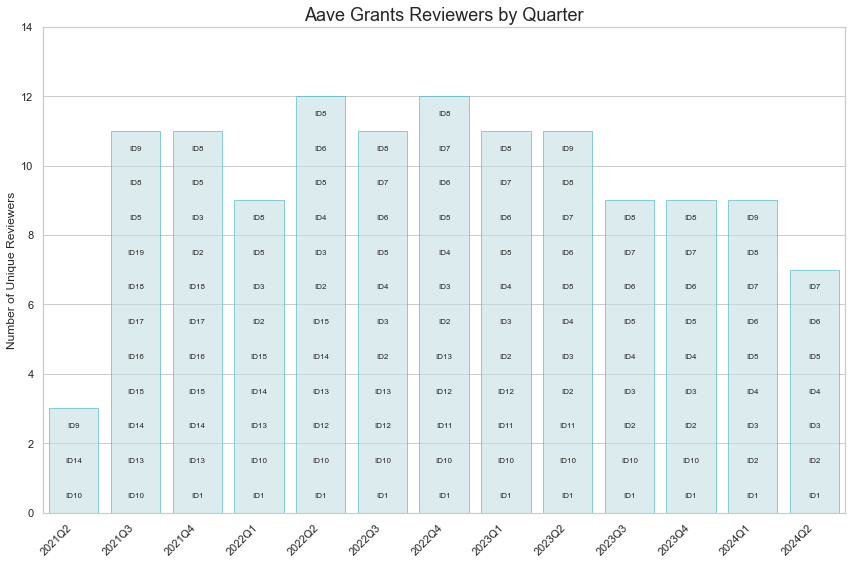

In [4]:
# Get unique reviewers per quarter
reviewer_names_per_quarter = reviewers_by_quarter.groupby('Quarter')['Reviewer ID'].unique().apply(list).reset_index()
reviewer_names_per_quarter.sort_values('Quarter', inplace=True)

# Get the count of reviewers for the bar plot height
quarter_counts = reviewers_by_quarter.groupby('Quarter')['Reviewer ID'].nunique().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=quarter_counts.index, y=quarter_counts.values, color=fill_color, edgecolor=line_color, alpha=0.6)

# Add reviewer names inside the bars
y_pos_dict = {}
# Create a sorted dataframe for placing text labels systematically
sorted_reviewers = reviewers_by_quarter.drop_duplicates(['Quarter', 'Reviewer ID']).sort_values(['Quarter', 'Reviewer ID'])

for _, row in sorted_reviewers.iterrows():
    quarter = row['Quarter']
    reviewer = row['Reviewer ID'].replace("ReviewerID", "ID") # Shorten name
    
    # Get the integer position of the quarter for plt.text
    try:
        x_pos = list(quarter_counts.index).index(quarter)
        y_pos = y_pos_dict.get(quarter, 0.5)
        plt.text(x_pos, y_pos, reviewer, ha='center', va='center', fontsize=8)
        y_pos_dict[quarter] = y_pos + 1
    except (ValueError, KeyError):
        # Handle cases where a quarter might not be in the final count if it has no reviewers
        continue


plt.title('Aave Grants Reviewers by Quarter', fontsize=18)
plt.xlabel('')
plt.ylabel('Number of Unique Reviewers')
plt.yticks(range(0, 16, 2))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<img src="Shot_Poses_IACS/OmniacPoses_08.png" width="120" style="right; margin: 8px 0 8px 20px;">

We can also look at acceptance rates by reviewer. Though the sample size for many reviewers is low, we can see at the high end, there is a reviewer with a 40% acceptance rate, while there are several that thus far have not accepted a single proposal.

In [5]:
# Define status categories
accepted_status = ["1st payment made ", "Approved", "Paid in full"]
rejected_status = ["Denial confirmed", "Denial Confirmed", "Review failed", "Screening failed"]

# Prepare data for acceptance rate calculation
acceptance_df = grants.dropna(subset=['Reviewer ID']).copy()

# Map statuses to simplified categories
conditions = [
    acceptance_df['Status'].isin(accepted_status),
    acceptance_df['Status'].isin(rejected_status)
]
choices = ['Accepted', 'Rejected']
acceptance_df['Status_Simple'] = np.select(conditions, choices, default='Pending Review')

# Calculate stats per reviewer
acceptance_summary = acceptance_df.groupby('Reviewer ID')['Status_Simple'].agg(
    Count='size',
    Num_Accepted=lambda s: (s == 'Accepted').sum(),
    Num_Rejected=lambda s: (s == 'Rejected').sum(),
    Num_Pending=lambda s: (s == 'Pending Review').sum()
).reset_index()

# Calculate acceptance rate
acceptance_summary['Acceptance Rate'] = (acceptance_summary['Num_Accepted'] / acceptance_summary['Count'])

# Format the rate as a percentage string for display
acceptance_summary['Acceptance Rate'] = acceptance_summary['Acceptance Rate'].apply(lambda x: f"{x:.0%}")

# Rename columns for better readability
acceptance_summary.rename(columns={
    'Reviewer ID': 'Reviewer ID',
    'Num_Accepted': 'Num Accepted',
    'Num_Rejected': 'Num Rejected',
    'Num_Pending': 'Num Pending'
}, inplace=True)


# Display the resulting table
from IPython.display import display
print("Acceptance Rates by Reviewer:")
display(acceptance_summary)

Acceptance Rates by Reviewer:


,Reviewer ID,Count,Num Accepted,Num Rejected,Num Pending,Acceptance Rate
0,ReviewerID1,204,20,183,1,10%
1,ReviewerID10,197,10,184,3,5%
2,ReviewerID11,94,4,89,1,4%
3,ReviewerID12,37,7,29,1,19%
4,ReviewerID13,65,16,38,11,25%
5,ReviewerID14,49,10,28,11,20%
6,ReviewerID15,47,9,36,2,19%
7,ReviewerID16,8,1,4,3,12%
8,ReviewerID17,10,4,3,3,40%
9,ReviewerID18,3,0,2,1,0%



<img src="Shot_Poses_IACS/OmniacPoses_09.png" width="120" style="float:right; margin: 8px 0 8px 20px;">

### Average Number of Words per Review

Next, let's do a word count analysis. We'll first look at the average number of words per review, using the text reviews, as encompassed in the `Review Rationale` column.

In [6]:
# Define a simple word count function
def word_count(text):
    if pd.isna(text) or text == '':
        return 0
    return len(str(text).split())

# Calculate overall average
avg_review_words = grants['Review Rationale'].dropna().apply(word_count).mean()
print(f"The overall average number of words per review is: {avg_review_words:.1f}\n")


# Calculate stats by reviewer
review_word_counts = grants.dropna(subset=['Review Rationale', 'Reviewer ID']).copy()
review_word_counts['Words'] = review_word_counts['Review Rationale'].apply(word_count)

review_wc_summary = review_word_counts.groupby('Reviewer ID')['Words'].agg(
    ['mean', 'median', 'min', 'max']
).round(1)

review_wc_summary.rename(columns={
    'mean': 'Average Words',
    'median': 'Median Words',
    'min': 'Min Words',
    'max': 'Max Words'
}, inplace=True)

print("Word Count Statistics per Reviewer (from Review Rationale):")
display(review_wc_summary)

The overall average number of words per review is: 33.1

Word Count Statistics per Reviewer (from Review Rationale):


,Average Words,Median Words,Min Words,Max Words
Reviewer ID,,,,
ReviewerID1,49.5,44.0,4,447
ReviewerID10,39.0,29.0,1,311
ReviewerID11,19.8,13.0,2,73
ReviewerID12,34.2,25.0,2,157
ReviewerID13,11.8,7.5,1,70
ReviewerID14,26.2,19.0,2,144
ReviewerID15,12.0,7.0,2,86
ReviewerID16,141.3,131.0,63,326
ReviewerID17,28.6,29.0,13,45


The distribution overall is very right tailed, with most reviews tending to be shorter, but then a few outlier reviews with a significant number of words.

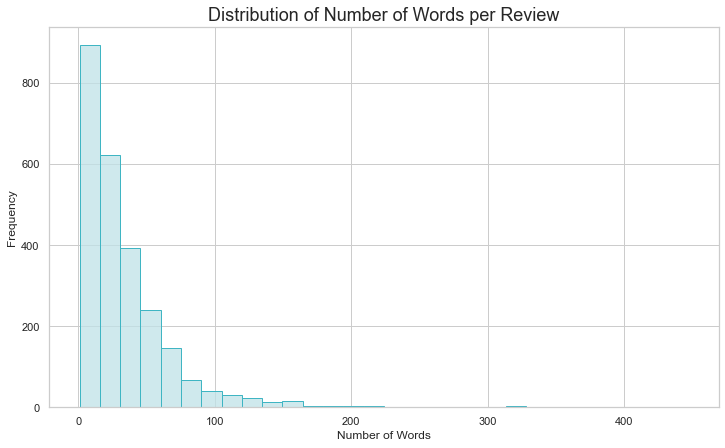

In [7]:
plt.figure(figsize=(12, 7))
sns.histplot(data=review_word_counts, x='Words', color=fill_color, edgecolor=line_color, bins=30)
plt.title('Distribution of Number of Words per Review', fontsize=18)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Breaking down each reviewer individually, we can plot the number of words over time to see the variability at the reviewer level.

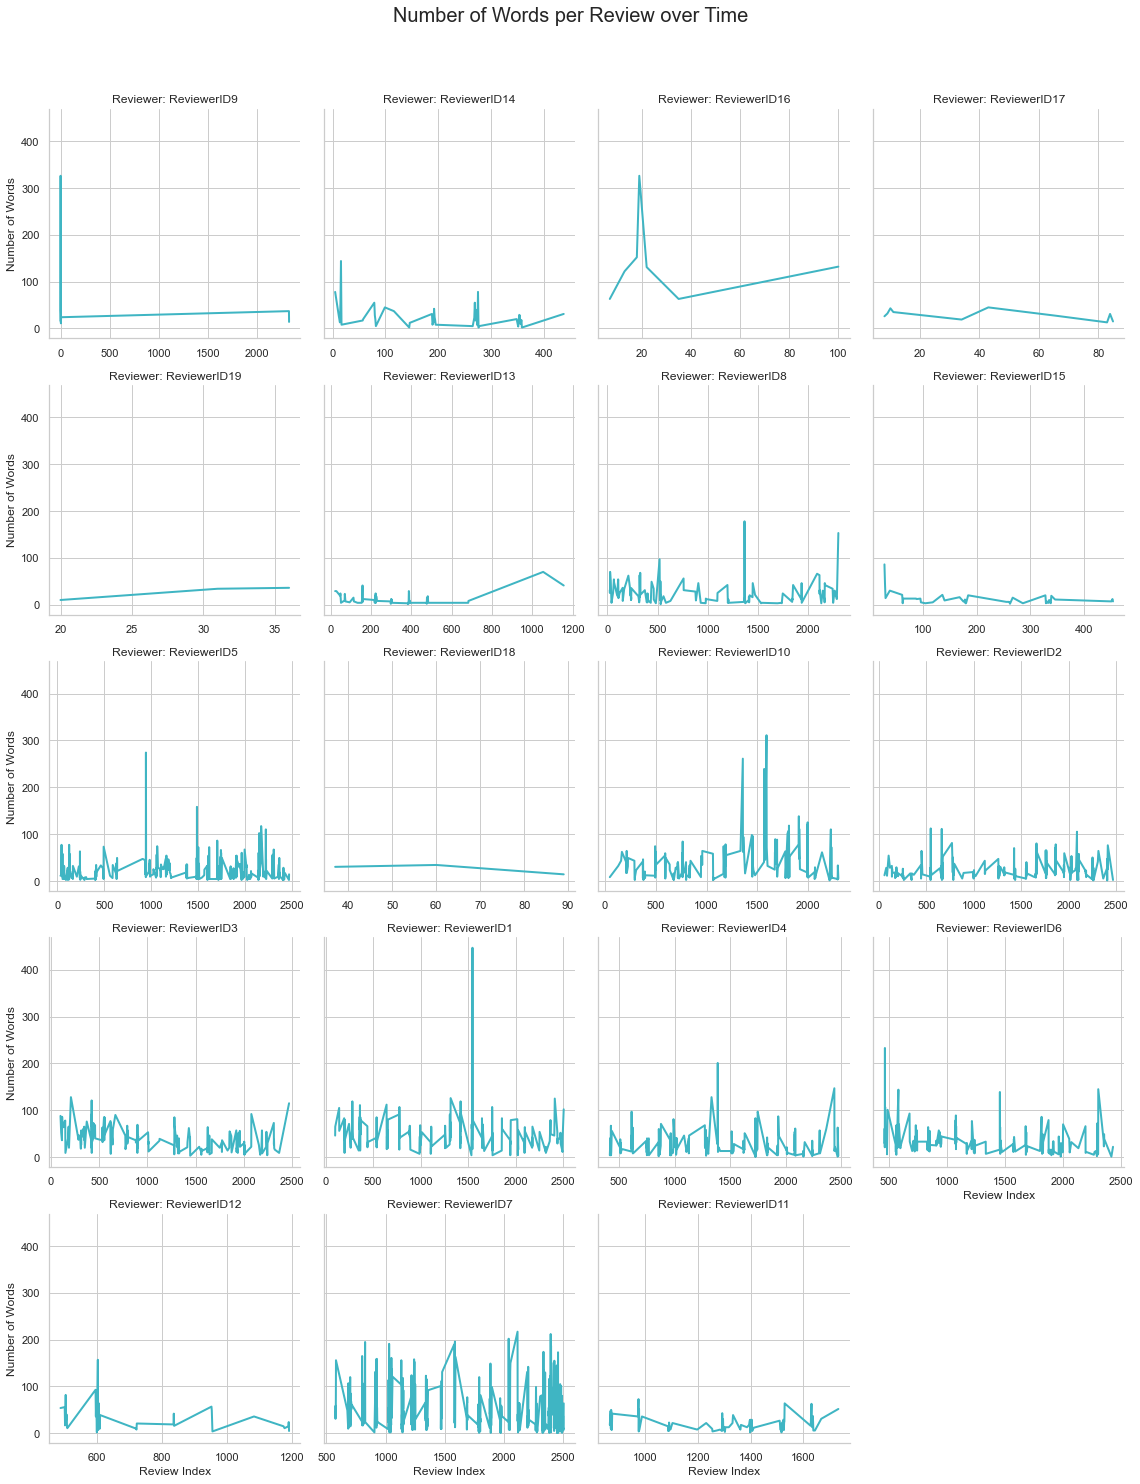

In [8]:
# Prepare data for plotting over time
review_wc_over_time = grants.dropna(subset=['Review Rationale', 'Reviewer ID']).copy()
review_wc_over_time['Words'] = review_wc_over_time['Review Rationale'].apply(word_count)
# Use a numeric ID for plotting instead of date
review_wc_over_time = review_wc_over_time.sort_values('Date').reset_index(drop=True)
review_wc_over_time['Review Index'] = review_wc_over_time.index

# Create faceted plot
g = sns.FacetGrid(review_wc_over_time, col="Reviewer ID", col_wrap=4, height=4, sharex=False)
g.map(sns.lineplot, 'Review Index', 'Words', color=line_color, lw=2)
g.fig.suptitle('Number of Words per Review over Time', y=1.03, fontsize=20)
g.set_titles("Reviewer: {col_name}")
g.set_axis_labels("Review Index", "Number of Words")
plt.tight_layout()
plt.show()

<img src="Shot_Poses_IACS/OmniacPoses_21.png" width="120" style="float:right; margin: 8px 0 8px 20px;">

The same data above can be plotted cumulatively. At the upper end, some reviewers have written around 2000 words already!

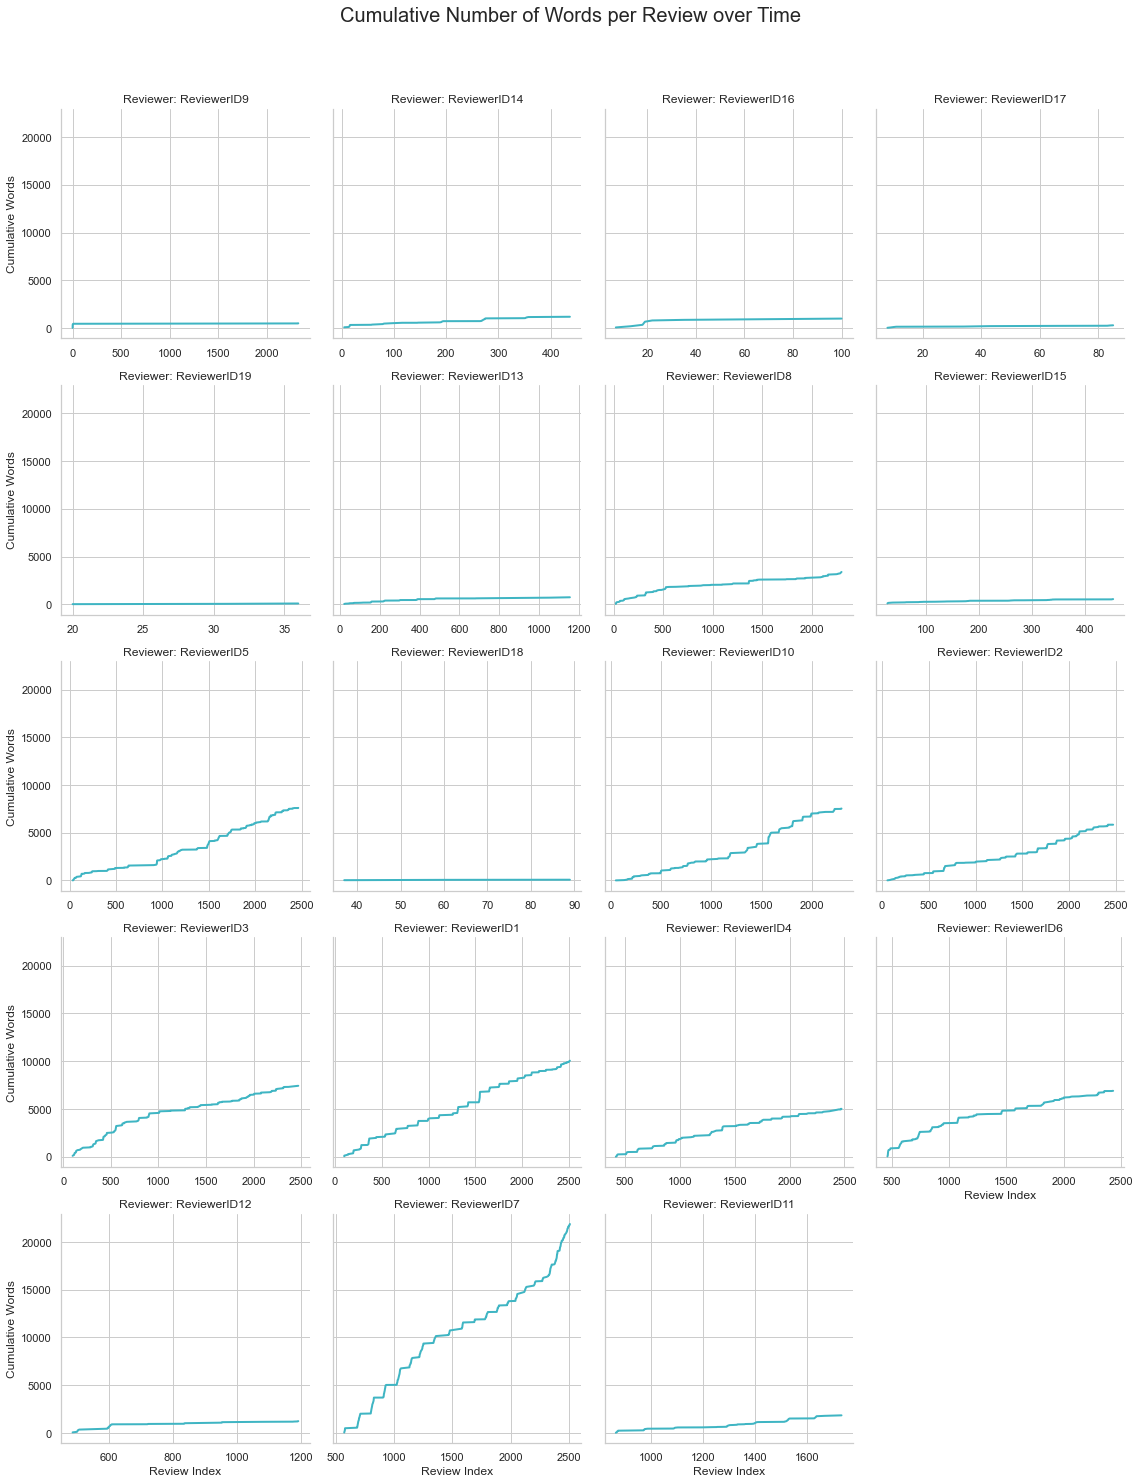

In [9]:
# Calculate cumulative sum of words for each reviewer
review_wc_over_time['Cumulative Words'] = review_wc_over_time.groupby('Reviewer ID')['Words'].cumsum()

# Create faceted plot for cumulative words
g = sns.FacetGrid(review_wc_over_time, col="Reviewer ID", col_wrap=4, height=4, sharex=False)
g.map(sns.lineplot, 'Review Index', 'Cumulative Words', color=line_color, lw=2)
g.fig.suptitle('Cumulative Number of Words per Review over Time', y=1.03, fontsize=20)
g.set_titles("Reviewer: {col_name}")
g.set_axis_labels("Review Index", "Cumulative Words")
plt.tight_layout()
plt.show()

<div style="display: flex; justify-content: space-between; align-items: flex-end;">
  <img src="Shot_Poses_IACS/OmniacPoses_27.png" width="210"/>
</div>

### Average Number of Words per Interview

Now, let's perform the same analysis by interview.

In [10]:
# Calculate overall average
avg_interview_words = grants['Interview Rationale'].dropna().apply(word_count).mean()
print(f"The overall average number of words per interview is: {avg_interview_words:.1f}\n")

# Calculate stats by reviewer
interview_word_counts = grants.dropna(subset=['Interview Rationale', 'Reviewer ID']).copy()
interview_word_counts['Words'] = interview_word_counts['Interview Rationale'].apply(word_count)

interview_wc_summary = interview_word_counts.groupby('Reviewer ID')['Words'].agg(
    ['mean', 'median', 'min', 'max']
).round(1)

interview_wc_summary.rename(columns={
    'mean': 'Average Words',
    'median': 'Median Words',
    'min': 'Min Words',
    'max': 'Max Words'
}, inplace=True)

print("Word Count Statistics per Reviewer (from Interview Rationale):")
display(interview_wc_summary)

The overall average number of words per interview is: 63.6

Word Count Statistics per Reviewer (from Interview Rationale):


,Average Words,Median Words,Min Words,Max Words
Reviewer ID,,,,
ReviewerID1,62.1,63.5,13,160
ReviewerID10,77.5,77.0,40,116
ReviewerID12,55.5,51.0,28,96
ReviewerID13,64.4,53.0,17,137
ReviewerID14,64.0,56.5,14,207
ReviewerID15,52.7,33.5,10,133
ReviewerID16,43.3,45.0,15,70
ReviewerID17,58.5,58.5,54,63
ReviewerID19,19.0,19.0,17,21


This finding is especially visible in the distribution, where it is much less right tailed and instead there is a noticeably larger mass on the higher end of the word count values.

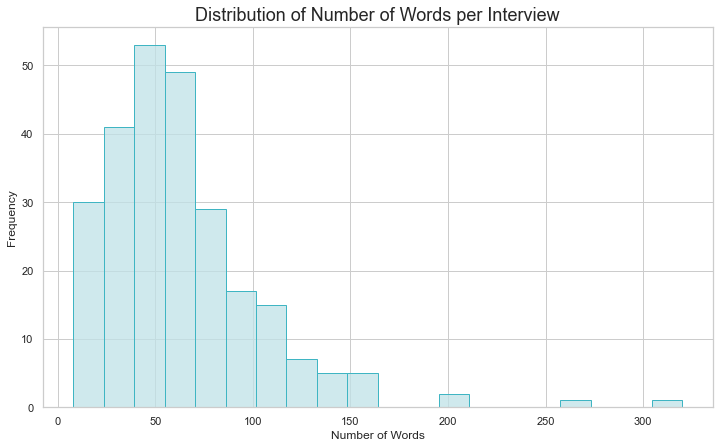

In [11]:
plt.figure(figsize=(12, 7))
sns.histplot(data=interview_word_counts, x='Words', color=fill_color, edgecolor=line_color, bins=20)
plt.title('Distribution of Number of Words per Interview', fontsize=18)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

The cumulative charts show that the most prolific reviewer in terms of interview rationale has written over 1000 words of justification.

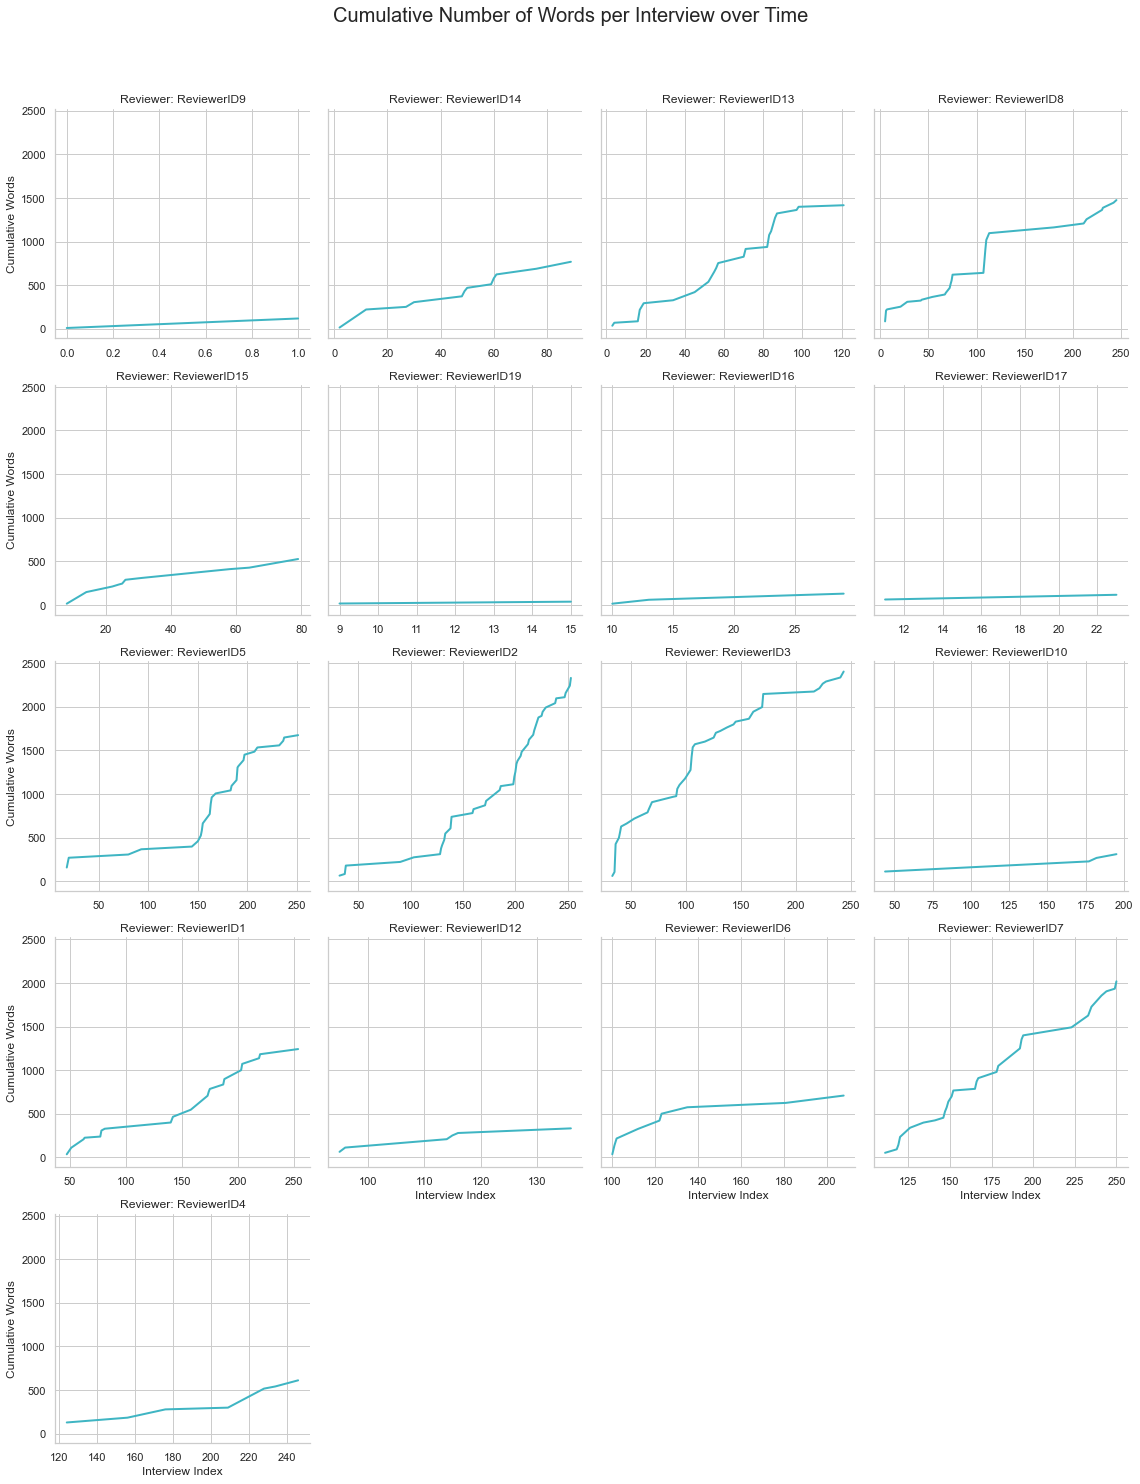

In [12]:
# Prepare data for plotting over time
interview_wc_over_time = grants.dropna(subset=['Interview Rationale', 'Reviewer ID']).copy()
interview_wc_over_time['Words'] = interview_wc_over_time['Interview Rationale'].apply(word_count)
interview_wc_over_time = interview_wc_over_time.sort_values('Date').reset_index(drop=True)
interview_wc_over_time['Interview Index'] = interview_wc_over_time.index

# Calculate cumulative sum
interview_wc_over_time['Cumulative Words'] = interview_wc_over_time.groupby('Reviewer ID')['Words'].cumsum()

# Create faceted plot for cumulative words
g = sns.FacetGrid(interview_wc_over_time, col="Reviewer ID", col_wrap=4, height=4, sharex=False)
g.map(sns.lineplot, 'Interview Index', 'Cumulative Words', color=line_color, lw=2)
g.fig.suptitle('Cumulative Number of Words per Interview over Time', y=1.03, fontsize=20)
g.set_titles("Reviewer: {col_name}")
g.set_axis_labels("Interview Index", "Cumulative Words")
plt.tight_layout()
plt.show()

<img src="Shot_Poses_IACS/OmniacPoses_31.png" width="120" style="left; margin: 8px 0 8px 20px;">


### Average Number of Words per Review+Interview Combined

We will now combine the review and interview rationale into one text field, to look at an analysis of the two combined.

In [13]:
# Create the combined rationale column
grants['Combined Rationale'] = grants['Review Rationale'].fillna('') + ' ' + grants['Interview Rationale'].fillna('')

# Calculate overall average from the new combined column
avg_combined_words = grants['Combined Rationale'].apply(word_count).mean()
print(f"The overall average number of words per combined review/interview is: {avg_combined_words:.1f}\n")

# Calculate stats by reviewer
combined_word_counts = grants.copy()
combined_word_counts['Words'] = combined_word_counts['Combined Rationale'].apply(word_count)
# Filter out entries where the combined rationale is empty and reviewer is missing
combined_word_counts = combined_word_counts[combined_word_counts['Words'] > 0]
combined_word_counts.dropna(subset=['Reviewer ID'], inplace=True)


combined_wc_summary = combined_word_counts.groupby('Reviewer ID')['Words'].agg(
    ['mean', 'median', 'min', 'max']
).round(1)

combined_wc_summary.rename(columns={
    'mean': 'Average Words',
    'median': 'Median Words',
    'min': 'Min Words',
    'max': 'Max Words'
}, inplace=True)

print("Word Count Statistics per Reviewer (from Combined Rationale):")
display(combined_wc_summary)

The overall average number of words per combined review/interview is: 37.1

Word Count Statistics per Reviewer (from Combined Rationale):


,Average Words,Median Words,Min Words,Max Words
Reviewer ID,,,,
ReviewerID1,55.7,44.0,4,447
ReviewerID10,40.6,29.0,1,377
ReviewerID11,19.8,13.0,2,73
ReviewerID12,43.4,25.0,2,253
ReviewerID13,34.1,11.0,2,150
ReviewerID14,42.4,19.5,2,261
ReviewerID15,23.2,7.5,2,163
ReviewerID16,139.9,126.5,15,326
ReviewerID17,40.3,33.5,13,89


The resulting distribution combines characteristics of each of the previous two we've seen, yielding a right-tailed distribution that is not as dramatic as for the reviewer-based distribution.

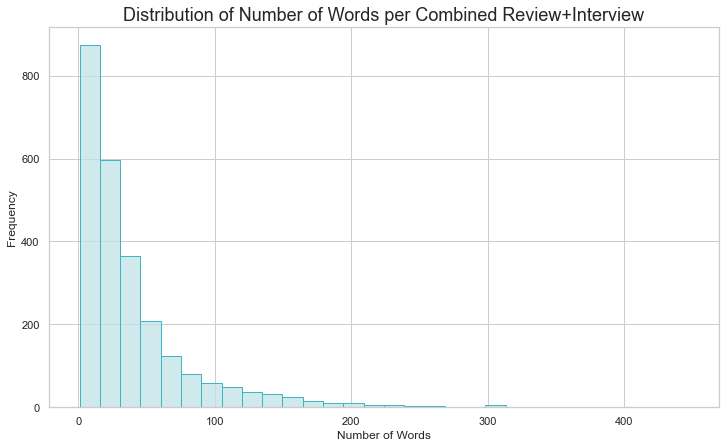

In [14]:
plt.figure(figsize=(12, 7))
sns.histplot(data=combined_word_counts, x='Words', color=fill_color, edgecolor=line_color, bins=30)
plt.title('Distribution of Number of Words per Combined Review+Interview', fontsize=18)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

When using the combined method, the most prolific combined reviewer/interviewer has written over 2500 words of rationale.

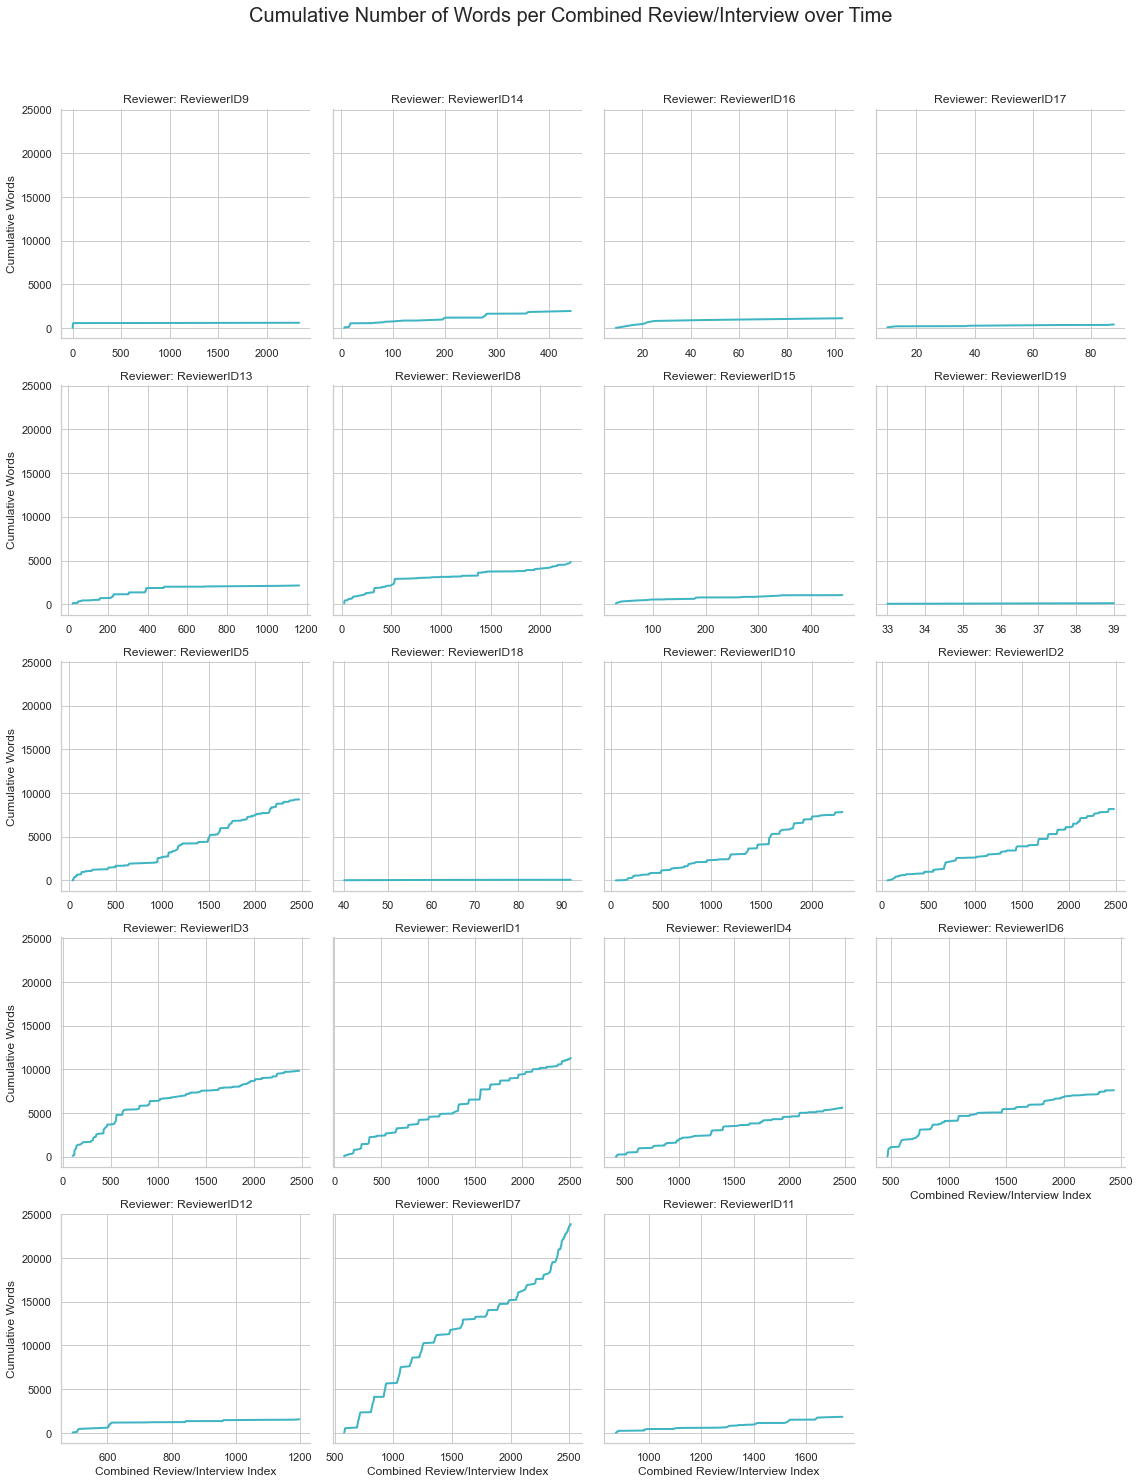

In [15]:
# Prepare data for plotting over time
combined_wc_over_time = grants.copy()
combined_wc_over_time['Words'] = combined_wc_over_time['Combined Rationale'].apply(word_count)
combined_wc_over_time = combined_wc_over_time[combined_wc_over_time['Words'] > 0]
combined_wc_over_time.dropna(subset=['Reviewer ID'], inplace=True)

combined_wc_over_time = combined_wc_over_time.sort_values('Date').reset_index(drop=True)
combined_wc_over_time['Combined Index'] = combined_wc_over_time.index

# Calculate cumulative sum
combined_wc_over_time['Cumulative Words'] = combined_wc_over_time.groupby('Reviewer ID')['Words'].cumsum()

# Create faceted plot for cumulative words
g = sns.FacetGrid(combined_wc_over_time, col="Reviewer ID", col_wrap=4, height=4, sharex=False)
g.map(sns.lineplot, 'Combined Index', 'Cumulative Words', color=line_color, lw=2)
g.fig.suptitle('Cumulative Number of Words per Combined Review/Interview over Time', y=1.03, fontsize=20)
g.set_titles("Reviewer: {col_name}")
g.set_axis_labels("Combined Review/Interview Index", "Cumulative Words")
plt.tight_layout()
plt.show()

<img src="Shot_Poses_IACS/OmniacPoses_41.png" width="120" style="right; margin: 8px 0 8px 20px;">
<img src="Shot_Poses_IACS/OmniacPoses_42.png" width="120" style="left; margin: 8px 0 8px 20px;">


## Conclusion

This analysis reveals important dynamics in the reviewer ecosystem of the Aave Grants DAO. Over the past several years, the DAO has successfully maintained a robust and stable pool of active reviewers, with approximately a dozen contributors per quarter, and a core group providing consistent participation over time.

While the average review tends to be concise—under 100 words—the presence of significant outliers indicates deeper engagement from certain reviewers, especially in interviews, where rationales are often more detailed. The data also highlight marked differences in reviewer acceptance rates and productivity, with a few reviewers standing out for both their frequency and the length of their feedback.

These findings point to the importance of reviewer diversity and sustained engagement for the health of the DAO’s grant-making process. Ensuring a mix of experienced and newer reviewers can help balance consistency with fresh perspectives, and tracking both qualitative (word count, rationale depth) and quantitative (number of reviews, acceptance rates) metrics will continue to improve transparency and the overall grant evaluation process.

Continued monitoring of these trends can inform future improvements to the review process, potentially increasing fairness and efficiency in funding high-impact projects for the Aave community.